# Einführung zum finiten Differenzenverfahren

Wir betrachten das finite Differenzenverfahren angewandt auf das Poisson-Problem
\begin{eqnarray}
    -\Delta u(x,y)&=&5\pi^2\sin(\pi x)\sin(2\pi y) \quad \text{ auf }\Omega, \\
    u(x,y)&=&\sin(\pi x)\sin(2\pi y) \quad \text{ auf }\delta\Omega,
\end{eqnarray}
wobei $\Omega=(0,1)^2$. Für dieses Problem gibt es auch eine analytische Lösung.

## Einbindung

Wir benutzen die folgenden Bibliotheken:

In [33]:
import numpy as np
import matplotlib.pyplot as plt

## Definition Problem

Wir definieren das Gebiet $\Omega$ und die rechte Seite $f$, sowie die Randwerte $g$.

In [34]:
#Rand des Gebietes Omega
xa=0
xb=1
ya=0
yb=1
#rechte Seite f
def f(x,y):
    return 5*np.pi**2 * np.sin(np.pi*x)*np.sin(2*np.pi*y)
#Funktion g am Rand
def g(x,y):
    return np.sin(np.pi*x)*np.sin(2*np.pi*y)


## Gitter

Wir erstellen im folgen ein äquidistantes Gitter mit Gitterweite $h$ und $n$ Zellen in $x-$ und $y-$Richtung.

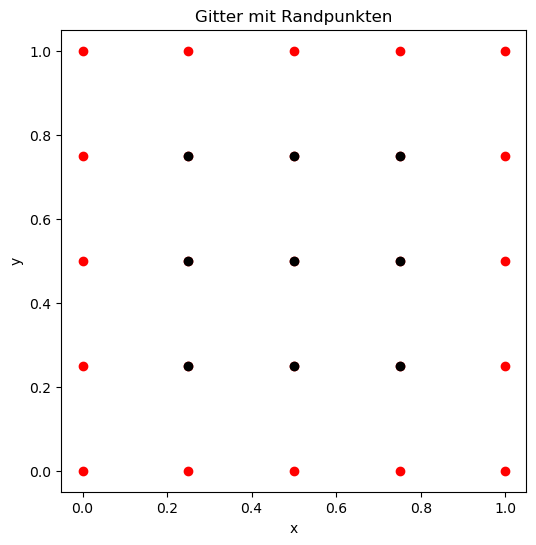

In [35]:
#Anzahl an Zellen in x- bzw. y-Richtung
n=4
#Gitterweite
h=1/n
#Gitter (innere Punkte)
x = np.linspace(xa+h, xb-h, n-1)
y = np.linspace(ya+h, yb-h, n-1)
X, Y = np.meshgrid(x, y)
#Gitter inklusive Randpunkte
x_total = np.linspace(xa, xb, n+1)
y_total = np.linspace(ya, yb, n+1)
X_total, Y_total = np.meshgrid(x_total, y_total)
#Plot Gitter 
plt.figure(figsize=(6,6))
plt.scatter(X_total, Y_total, color='red')
plt.scatter(X, Y, color='black')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gitter mit Randpunkten')
plt.show()

## Lineares Gleichungssystem

Wir stellen das lineare Gleichungssystem für das diskrete Poissonproblem auf.

Wir beginnen mit der Matrix $A$.

In [36]:
#Initialisierung als 0-Matrix
A = np.zeros(((n-1)**2,(n-1)**2))
#Erstellen der T-Matrix mit 4 auf der Hauptdiagonalen und -1 auf den beiden Nebendiagonalen
T = 4*np.eye(n-1) - np.eye(n-1, k=1) - np.eye(n-1, k=-1)
#Erstellen der -I-Matrix
I_neg = -1*np.eye(n-1)
#Füllen der Matrix A
for i in range(0,n-1):
    for j in range(0,n-1):
        #Matrix T
        if (i == j):
            A[i*(n-1):(i+1)*(n-1),j*(n-1):(j+1)*(n-1)] = T
        #Matrix -I
        if ((i == j-1) or (i == j+1)):
            A[i*(n-1):(i+1)*(n-1),j*(n-1):(j+1)*(n-1)] = I_neg
print("A=",A)

A= [[ 4. -1.  0. -1. -0. -0.  0.  0.  0.]
 [-1.  4. -1. -0. -1. -0.  0.  0.  0.]
 [ 0. -1.  4. -0. -0. -1.  0.  0.  0.]
 [-1. -0. -0.  4. -1.  0. -1. -0. -0.]
 [-0. -1. -0. -1.  4. -1. -0. -1. -0.]
 [-0. -0. -1.  0. -1.  4. -0. -0. -1.]
 [ 0.  0.  0. -1. -0. -0.  4. -1.  0.]
 [ 0.  0.  0. -0. -1. -0. -1.  4. -1.]
 [ 0.  0.  0. -0. -0. -1.  0. -1.  4.]]


Wir erstellen die rechte Seite $b$.

In [37]:
f = f(X,Y)
b = h**2*f.flatten() 
#Behandlung der Werte am Rand
for i in range(n-1):
    for j in range(n-1):
        #Index in b
        index = i*(n-1)+j
        #linker Rand
        if (i == 0):
            b[index] += g(xa,ya+h*(j+1))
        #rechter Rand
        if (i == n-2):
            b[index] += g(xb,ya+h*(j+1))
        #unterer Rand
        if (j == 0):
            b[index] += g(xa+h*(i+1),ya)
        #oberer Rand
        if (j == n-2):
            b[index] += g(xa+h*(i+1),yb)

Wir lösen das lineare Gleichungssystem $Au=b$.

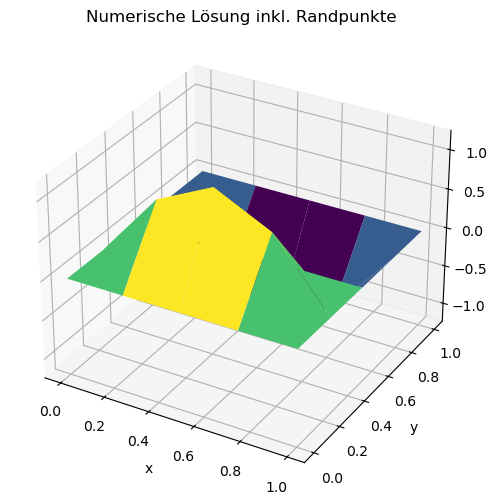

In [38]:
u = np.linalg.solve(A, b)
u_points = u.reshape((n-1, n-1))
#Plot
#Wir fügen die Randpunkte hinzu
u_total = np.zeros((n+1, n+1))
u_total[1:n,1:n] = u_points
u_total[0,:] = g(xa,y_total)
u_total[n,:] = g(xb,y_total)
u_total[:,0] = g(x_total,ya)
u_total[:,n] = g(x_total,yb)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X_total, Y_total, u_total, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u')
ax.set_title('Numerische Lösung inkl. Randpunkte')
plt.show()

## Aufgabe 1

(a) Bestimmen Sie die analytische Lösung und plotten Sie den Diskretisierungsfehler des Verfahrens.
(b) Erstellen Sie Funktionen für A(n) und b(n) und betrachten Sie den Fehler für verschiedene Werte $n$.

## Aufgabe 2

Erweitern Sie den Code für allgemeine rechteckige Gebiete mit unterschiedlicher Anzahl and Zellen in $x$- und $y$-Richtung. 